In [1]:
# only for cuda enabled laptop and desktop

In [2]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)
if physical_devices:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)

[]


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL #pillow to handle images
import tensorflow as tf

In [4]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz" #tgz = tar ball (just like zip file)
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)

In [5]:
data_dir

'C:\\Users\\HP\\.keras\\datasets\\flower_photos'

In [6]:
import os
os.listdir('C:\\Users\\HP\\.keras\\datasets\\flower_photos')

['daisy', 'dandelion', 'LICENSE.txt', 'roses', 'sunflowers', 'tulips']

In [7]:
os.listdir('C:\\Users\\HP\\.keras\\datasets\\flower_photos\\daisy')

['100080576_f52e8ee070_n.jpg',
 '10140303196_b88d3d6cec.jpg',
 '10172379554_b296050f82_n.jpg',
 '10172567486_2748826a8b.jpg',
 '10172636503_21bededa75_n.jpg',
 '102841525_bd6628ae3c.jpg',
 '1031799732_e7f4008c03.jpg',
 '10391248763_1d16681106_n.jpg',
 '10437754174_22ec990b77_m.jpg',
 '10437770546_8bb6f7bdd3_m.jpg',
 '10437929963_bc13eebe0c.jpg',
 '10466290366_cc72e33532.jpg',
 '10466558316_a7198b87e2.jpg',
 '10555749515_13a12a026e.jpg',
 '10555815624_dc211569b0.jpg',
 '10555826524_423eb8bf71_n.jpg',
 '10559679065_50d2b16f6d.jpg',
 '105806915_a9c13e2106_n.jpg',
 '10712722853_5632165b04.jpg',
 '107592979_aaa9cdfe78_m.jpg',
 '10770585085_4742b9dac3_n.jpg',
 '10841136265_af473efc60.jpg',
 '10993710036_2033222c91.jpg',
 '10993818044_4c19b86c82.jpg',
 '10994032453_ac7f8d9e2e.jpg',
 '11023214096_b5b39fab08.jpg',
 '11023272144_fce94401f2_m.jpg',
 '11023277956_8980d53169_m.jpg',
 '11124324295_503f3a0804.jpg',
 '1140299375_3aa7024466.jpg',
 '11439894966_dca877f0cd.jpg',
 '1150395827_6f94a5c6e4_n

In [8]:
os.listdir('C:\\Users\\HP\\.keras\\datasets\\flower_photos\\dandelion')

['10043234166_e6dd915111_n.jpg',
 '10200780773_c6051a7d71_n.jpg',
 '10294487385_92a0676c7d_m.jpg',
 '10437652486_aa86c14985.jpg',
 '10443973_aeb97513fc_m.jpg',
 '10477378514_9ffbcec4cf_m.jpg',
 '10486992895_20b344ce2d_n.jpg',
 '10617162044_8740d4dd9f_n.jpg',
 '10617191174_9a01753241_n.jpg',
 '10683189_bd6e371b97.jpg',
 '1074999133_1e4a1e042e.jpg',
 '10777398353_5a20bb218c.jpg',
 '10778387133_9141024b10.jpg',
 '10779476016_9130714dc0.jpg',
 '1080179756_5f05350a59.jpg',
 '10828951106_c3cd47983f.jpg',
 '10919961_0af657c4e8.jpg',
 '10946896405_81d2d50941_m.jpg',
 '11124381625_24b17662bd_n.jpg',
 '1128626197_3f52424215_n.jpg',
 '11296320473_1d9261ddcb.jpg',
 '11405573_24a8a838cc_n.jpg',
 '11465213433_847c4fa261.jpg',
 '11545123_50a340b473_m.jpg',
 '11595255065_d9550012fc.jpg',
 '11768468623_9399b5111b_n.jpg',
 '11775820493_10fedf4bff_n.jpg',
 '1193386857_3ae53574f2_m.jpg',
 '1195255751_d58b3d3076.jpg',
 '12094442595_297494dba4_m.jpg',
 '1241011700_261ae180ca.jpg',
 '126012913_edf771c564_n.j

In [9]:
os.listdir('C:\\Users\\HP\\.keras\\datasets\\flower_photos\\roses')

['10090824183_d02c613f10_m.jpg',
 '102501987_3cdb8e5394_n.jpg',
 '10503217854_e66a804309.jpg',
 '10894627425_ec76bbc757_n.jpg',
 '110472418_87b6a3aa98_m.jpg',
 '11102341464_508d558dfc_n.jpg',
 '11233672494_d8bf0a3dbf_n.jpg',
 '11694025703_9a906fedc1_n.jpg',
 '118974357_0faa23cce9_n.jpg',
 '11944957684_2cc806276e.jpg',
 '12045735155_42547ce4e9_n.jpg',
 '12165480946_c4a3fe182d_n.jpg',
 '12202373204_34fb07205b.jpg',
 '12238827553_cf427bfd51_n.jpg',
 '12240165555_98625b1e88_n.jpg',
 '12240303_80d87f77a3_n.jpg',
 '12240577184_b0de0e53ea_n.jpg',
 '12243068283_ee4c2683e2_n.jpg',
 '12243069253_e512464095_n.jpg',
 '123128873_546b8b7355_n.jpg',
 '12323085443_8ac0cdb713_n.jpg',
 '12338444334_72fcc2fc58_m.jpg',
 '12395698413_c0388278f7.jpg',
 '12406229175_82e2ac649c_n.jpg',
 '12406418663_af20dc225f_n.jpg',
 '12407768513_3440238148_n.jpg',
 '12434194695_a7c4e73c6b_n.jpg',
 '12450781274_eb78723921.jpg',
 '12562723334_a2e0a9e3c8_n.jpg',
 '12572786553_634868f7f2_n.jpg',
 '13231224664_4af5293a37.jpg',


In [10]:
os.listdir('C:\\Users\\HP\\.keras\\datasets\\flower_photos\\sunflowers')

['1008566138_6927679c8a.jpg',
 '1022552002_2b93faf9e7_n.jpg',
 '1022552036_67d33d5bd8_n.jpg',
 '10386503264_e05387e1f7_m.jpg',
 '10386522775_4f8c616999_m.jpg',
 '10386525005_fd0b7d6c55_n.jpg',
 '10386525695_2c38fea555_n.jpg',
 '10386540106_1431e73086_m.jpg',
 '10386540696_0a95ee53a8_n.jpg',
 '10386702973_e74a34c806_n.jpg',
 '1043442695_4556c4c13d_n.jpg',
 '1044296388_912143e1d4.jpg',
 '1064662314_c5a7891b9f_m.jpg',
 '10862313945_e8ed9202d9_m.jpg',
 '11881770944_22b4f2f8f6_n.jpg',
 '1217254584_4b3028b93d.jpg',
 '12282924083_fb80aa17d4_n.jpg',
 '1240624822_4111dde542.jpg',
 '1240625276_fb3bd0c7b1.jpg',
 '1240626292_52cd5d7fb1_m.jpg',
 '1244774242_25a20d99a9.jpg',
 '12471290635_1f9e3aae16_n.jpg',
 '12471441503_d188b5f31a_m.jpg',
 '12471443383_b71e7a7480_m.jpg',
 '12471791574_bb1be83df4.jpg',
 '1267876087_a1b3c63dc9.jpg',
 '127192624_afa3d9cb84.jpg',
 '1297092593_e573c0a3d6.jpg',
 '13095941995_9a66faa713_n.jpg',
 '13096076565_72c2c60875_n.jpg',
 '13117907313_86c99c6441.jpg',
 '1314584013_f

In [11]:
os.listdir('C:\\Users\\HP\\.keras\\datasets\\flower_photos\\tulips')

['100930342_92e8746431_n.jpg',
 '10094729603_eeca3f2cb6.jpg',
 '10094731133_94a942463c.jpg',
 '10128546863_8de70c610d.jpg',
 '10163955604_ae0b830975_n.jpg',
 '10164073235_f29931d91e.jpg',
 '10686568196_b1915544a8.jpg',
 '107693873_86021ac4ea_n.jpg',
 '10791227_7168491604.jpg',
 '10995953955_089572caf0.jpg',
 '110147301_ad921e2828.jpg',
 '112334842_3ecf7585dd.jpg',
 '112428665_d8f3632f36_n.jpg',
 '112428919_f0c5ad7d9d_n.jpg',
 '112650879_82adc2cc04_n.jpg',
 '112651128_7b5d39a346_m.jpg',
 '112951022_4892b1348b_n.jpg',
 '112951086_150a59d499_n.jpg',
 '113291410_1bdc718ed8_n.jpg',
 '113902743_8f537f769b_n.jpg',
 '113960470_38fab8f2fb_m.jpg',
 '11441893003_ab83672800.jpg',
 '11614202956_1dcf1c96a1.jpg',
 '116343334_9cb4acdc57_n.jpg',
 '11746080_963537acdc.jpg',
 '11746276_de3dec8201.jpg',
 '11746367_d23a35b085_n.jpg',
 '11746452_5bc1749a36.jpg',
 '11746548_26b3256922_n.jpg',
 '12024561754_ce9667e4dc_n.jpg',
 '12025038686_7f10811d4b_n.jpg',
 '12025042086_78bafc0eb6_n.jpg',
 '12163418275_bd6a

In [12]:
len(os.listdir('C:\\Users\\HP\\.keras\\datasets\\flower_photos\\daisy'))

633

In [13]:
len(os.listdir('C:\\Users\\HP\\.keras\\datasets\\flower_photos\\dandelion'))

898

In [14]:
len(os.listdir('C:\\Users\\HP\\.keras\\datasets\\flower_photos\\roses'))

641

In [15]:
len(os.listdir('C:\\Users\\HP\\.keras\\datasets\\flower_photos\\sunflowers'))

699

In [16]:
len(os.listdir('C:\\Users\\HP\\.keras\\datasets\\flower_photos\\tulips'))

799

In [17]:
len(os.listdir('C:\\Users\\HP\\.keras\\datasets\\flower_photos\\daisy'))+len(os.listdir('C:\\Users\\HP\\.keras\\datasets\\flower_photos\\dandelion'))+len(os.listdir('C:\\Users\\HP\\.keras\\datasets\\flower_photos\\roses'))+len(os.listdir('C:\\Users\\HP\\.keras\\datasets\\flower_photos\\sunflowers'))+len(os.listdir('C:\\Users\\HP\\.keras\\datasets\\flower_photos\\tulips'))

3670

In [18]:
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/HP/.keras/datasets/flower_photos')

In [19]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img,array_to_img,img_to_array
from keras.models import Sequential
from glob import glob   #to handle folder/Directory

In [20]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [21]:
list(data_dir.glob('*'))

[WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/dandelion'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/LICENSE.txt'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/sunflowers'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips')]

In [22]:
list(data_dir.glob('daisy/*'))

[WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/10437929963

In [23]:
list(data_dir.glob('dandelion/*'))

[WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/dandelion/10043234166_e6dd915111_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/dandelion/10200780773_c6051a7d71_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/dandelion/10294487385_92a0676c7d_m.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/dandelion/10437652486_aa86c14985.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/dandelion/10443973_aeb97513fc_m.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/dandelion/10477378514_9ffbcec4cf_m.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/dandelion/10486992895_20b344ce2d_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/dandelion/10617162044_8740d4dd9f_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/dandelion/10617191174_9a01753241_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/dandelion/10683189_bd6e371b97.jpg'),
 WindowsPath('C:/Users/HP/.ker

In [24]:
list(data_dir.glob('roses/*'))

[WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/12045735

In [25]:
list(data_dir.glob('sunflowers/*'))

[WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/sunflowers/1008566138_6927679c8a.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/sunflowers/1022552002_2b93faf9e7_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/sunflowers/1022552036_67d33d5bd8_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/sunflowers/10386503264_e05387e1f7_m.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/sunflowers/10386522775_4f8c616999_m.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/sunflowers/10386525005_fd0b7d6c55_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/sunflowers/10386525695_2c38fea555_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/sunflowers/10386540106_1431e73086_m.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/sunflowers/10386540696_0a95ee53a8_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/sunflowers/10386702973_e74a34c806_n.jpg'),
 WindowsPath('C

In [26]:
list(data_dir.glob('tulips/*'))

[WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/10164073235_f29931d91e.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/10686568196_b1915544a8.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/107693873_86021ac4ea_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/10791227_7168491604.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/10995953955_089572caf0.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/11014730

In [27]:
list(data_dir.glob('*/*'))

[WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/10437929963

In [28]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [29]:
roses_count = len(list(data_dir.glob('roses/*.jpg')))
print(roses_count)

641


In [30]:
tulip_count = len(list(data_dir.glob('tulips/*.jpg')))
print(tulip_count)

799


In [31]:
daisy_count = len(list(data_dir.glob('daisy/*.jpg')))
print(daisy_count)

633


In [32]:
dandelion_count = len(list(data_dir.glob('dandelion/*.jpg')))
print(dandelion_count)

898


In [33]:
sunflowers_count = len(list(data_dir.glob('sunflowers/*.jpg')))
print(sunflowers_count)

699


In [34]:
roses = list(data_dir.glob('roses/*.jpg'))
roses

[WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/12045735

In [35]:
tulips = list(data_dir.glob('tulips/*.jpg'))
tulips

[WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/10164073235_f29931d91e.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/10686568196_b1915544a8.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/107693873_86021ac4ea_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/10791227_7168491604.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/10995953955_089572caf0.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/11014730

In [36]:
daisy = list(data_dir.glob('daisy/*.jpg'))
daisy

[WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/10437929963

In [37]:
dandelion = list(data_dir.glob('dandelion/*.jpg'))
dandelion

[WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/dandelion/10043234166_e6dd915111_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/dandelion/10200780773_c6051a7d71_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/dandelion/10294487385_92a0676c7d_m.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/dandelion/10437652486_aa86c14985.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/dandelion/10443973_aeb97513fc_m.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/dandelion/10477378514_9ffbcec4cf_m.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/dandelion/10486992895_20b344ce2d_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/dandelion/10617162044_8740d4dd9f_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/dandelion/10617191174_9a01753241_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/dandelion/10683189_bd6e371b97.jpg'),
 WindowsPath('C:/Users/HP/.ker

In [38]:
sunflowers = list(data_dir.glob('sunflowers/*.jpg'))
sunflowers

[WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/sunflowers/1008566138_6927679c8a.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/sunflowers/1022552002_2b93faf9e7_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/sunflowers/1022552036_67d33d5bd8_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/sunflowers/10386503264_e05387e1f7_m.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/sunflowers/10386522775_4f8c616999_m.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/sunflowers/10386525005_fd0b7d6c55_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/sunflowers/10386525695_2c38fea555_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/sunflowers/10386540106_1431e73086_m.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/sunflowers/10386540696_0a95ee53a8_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/sunflowers/10386702973_e74a34c806_n.jpg'),
 WindowsPath('C

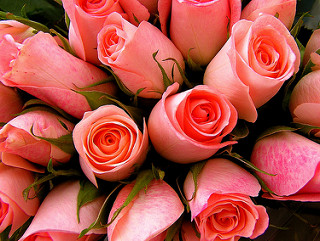

In [39]:
load_img('C:/Users/HP/.keras/datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg')

In [40]:
roses

[WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/12045735

In [41]:
sunflowers

[WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/sunflowers/1008566138_6927679c8a.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/sunflowers/1022552002_2b93faf9e7_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/sunflowers/1022552036_67d33d5bd8_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/sunflowers/10386503264_e05387e1f7_m.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/sunflowers/10386522775_4f8c616999_m.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/sunflowers/10386525005_fd0b7d6c55_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/sunflowers/10386525695_2c38fea555_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/sunflowers/10386540106_1431e73086_m.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/sunflowers/10386540696_0a95ee53a8_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/sunflowers/10386702973_e74a34c806_n.jpg'),
 WindowsPath('C

In [42]:
daisy

[WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy/10437929963

In [43]:
dandelion

[WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/dandelion/10043234166_e6dd915111_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/dandelion/10200780773_c6051a7d71_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/dandelion/10294487385_92a0676c7d_m.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/dandelion/10437652486_aa86c14985.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/dandelion/10443973_aeb97513fc_m.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/dandelion/10477378514_9ffbcec4cf_m.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/dandelion/10486992895_20b344ce2d_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/dandelion/10617162044_8740d4dd9f_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/dandelion/10617191174_9a01753241_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/dandelion/10683189_bd6e371b97.jpg'),
 WindowsPath('C:/Users/HP/.ker

In [44]:
tulips

[WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/10164073235_f29931d91e.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/10686568196_b1915544a8.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/107693873_86021ac4ea_n.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/10791227_7168491604.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/10995953955_089572caf0.jpg'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips/11014730

In [45]:
roses[35]

WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses/1392579828_ab5a139052.jpg')

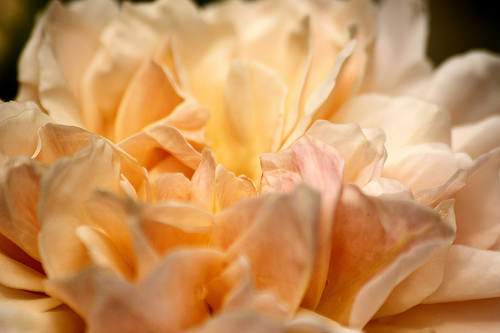

In [46]:
PIL.Image.open(str(roses[52]))

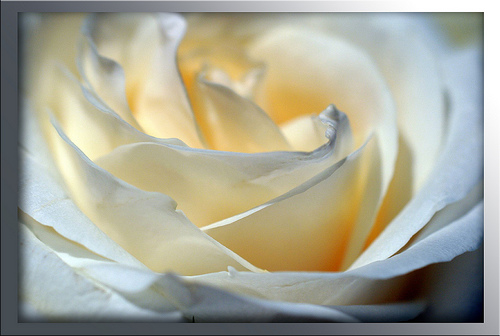

In [47]:
PIL.Image.open(str(roses[234]))

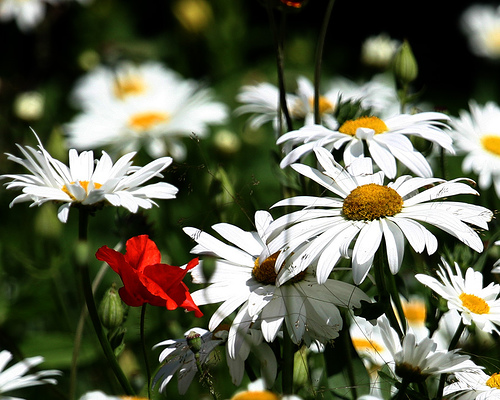

In [48]:
load_img('C:/Users/HP/.keras/datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg')

In [49]:
batch_size = 64
epochs = 50
IMG_HIEGHT = 224
IMG_WIDHT = 224

In [50]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.3,
                                    validation_split=0.2)

In [51]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                    directory=data_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_HIEGHT,IMG_HIEGHT),
                                                    subset='training')

Found 2939 images belonging to 5 classes.


In [52]:
train_data_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [53]:
image_gen_val = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)

In [54]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                directory=data_dir,
                                                target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                subset='validation')

Found 731 images belonging to 5 classes.


In [55]:
3670*0.2

734.0

In [56]:
sample_img,label = next(train_data_gen)

In [57]:
sample_img.shape

(64, 224, 224, 3)

In [58]:
label

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1.

In [59]:
from keras.layers import Conv2D,MaxPooling2D,Dropout
model = Sequential([
    Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HIEGHT,IMG_WIDHT,3)),
    MaxPooling2D(),
    #Dropout(0.2),
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPooling2D(),
    #Dropout(0.2),
    Conv2D(64,3,padding='same',activation='relu'),
    MaxPooling2D(),
    #Dropout(0.2),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(256,activation='relu'),
    Dense(5,activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

In [60]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [61]:
filepath = 'my_best_flower.h5'

In [62]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath=filepath,
                            monitor='val_loss',
                            verbose=1,
                            save_best_only=True,
                            mode='min')

In [63]:
callbacks = [checkpoint]

In [64]:
history = model.fit(train_data_gen,validation_data=val_data_gen,epochs=10,verbose=2,callbacks=callbacks)

Epoch 1/10
46/46 - 106s - loss: 1.5138 - accuracy: 0.3733 - val_loss: 1.4367 - val_accuracy: 0.4090

Epoch 00001: val_loss improved from inf to 1.43667, saving model to my_best_flower.h5
Epoch 2/10
46/46 - 89s - loss: 1.1185 - accuracy: 0.5417 - val_loss: 1.0617 - val_accuracy: 0.5609

Epoch 00002: val_loss improved from 1.43667 to 1.06172, saving model to my_best_flower.h5
Epoch 3/10
46/46 - 89s - loss: 1.0366 - accuracy: 0.5801 - val_loss: 1.0582 - val_accuracy: 0.5910

Epoch 00003: val_loss improved from 1.06172 to 1.05816, saving model to my_best_flower.h5
Epoch 4/10
46/46 - 112s - loss: 0.9485 - accuracy: 0.6281 - val_loss: 1.0087 - val_accuracy: 0.6060

Epoch 00004: val_loss improved from 1.05816 to 1.00865, saving model to my_best_flower.h5
Epoch 5/10
46/46 - 111s - loss: 0.9057 - accuracy: 0.6438 - val_loss: 0.9293 - val_accuracy: 0.6361

Epoch 00005: val_loss improved from 1.00865 to 0.92927, saving model to my_best_flower.h5
Epoch 6/10
46/46 - 113s - loss: 0.8738 - accuracy: 

In [65]:
model = tf.keras.models.load_model('my_best_flower.h5')

In [66]:
img = load_img('Rose-image.jpeg',target_size=(224,224))

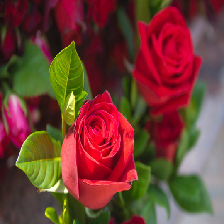

In [67]:
img

In [68]:
img_array = img_to_array(img)
img_array.shape

(224, 224, 3)

In [69]:
img_array = img_array.reshape(1,224, 224, 3)

In [70]:
img_array.shape

(1, 224, 224, 3)

In [71]:
class_name = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [72]:
model.predict(img_array)

array([[0., 0., 0., 0., 1.]], dtype=float32)

In [73]:
np.argmax(model.predict(img_array),axis=1)

array([4], dtype=int64)

In [74]:
np.argmax(model.predict(img_array),axis=1)[0]

4

In [75]:
class_name[np.argmax(model.predict(img_array),axis=1)[0]]

'tulips'